<a href="https://colab.research.google.com/github/David-GHMM/ML-Lab3/blob/main/%D0%9C%D0%9E_%D0%9B%D0%A03_%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D1%80%D1%8F%D0%BD_%D0%9F%D0%98%D0%9D_231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 3
# Бинарная классификация

**Цель работы:** познакомиться с применением модели машинного обучения для решения задачи классификации (метод логистической регрессии)

Набор данных включает следующие атрибуты:
* **Age** – возраст клиента
* **Employment Type** – сектор, в котором работает клиент
* **Graduate Or Not** – независимо от того, окончил клиент колледж или нет
* **Annual Income** – годовой доход клиента (округлено до ближайших 50 тыс.)
* **Family Members** – количество членов семьи клиента
* **Chronic Disease** – страдает ли клиент какими-либо серьезными заболеваниями
или состояниями (диабет, высокое артериальное давление, астма и т.д.)
* **Frequent Flyer** – данные о часто летающих пассажирах, полученные на основе
истории бронирования авиабилетов клиентом как минимум в 4 различных случаях за
последние 2 года (2017–2019).
* **Ever Travelled Abroad** – выезжал ли клиент когда-либо в другую страну (не
обязательно с использованием услуг компании)
* **Travel Insurance** – приобретал ли клиент туристический страховой пакет во
время ознакомительного предложения, проведенного в 2019 г. (целевая переменная)

### 1. Импортируем библиотеки и загружаем данные

In [1182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1183]:
df = pd.read_csv("Travel.csv", index_col='Unnamed: 0')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Выведем целевую переменную, целевые имена и частоту каждого уникального значения:

In [1184]:
(unique, counts) = np.unique(df['TravelInsurance'], return_counts=True)
print('Unique values of the target variable: ', unique)
print('Counts of the target variable: ', counts)

Unique values of the target variable:  [0 1]
Counts of the target variable:  [1277  710]


Построим столбчатую диаграмму, чтобы увидеть целевую переменную:

<Axes: xlabel='TravelInsurance', ylabel='count'>

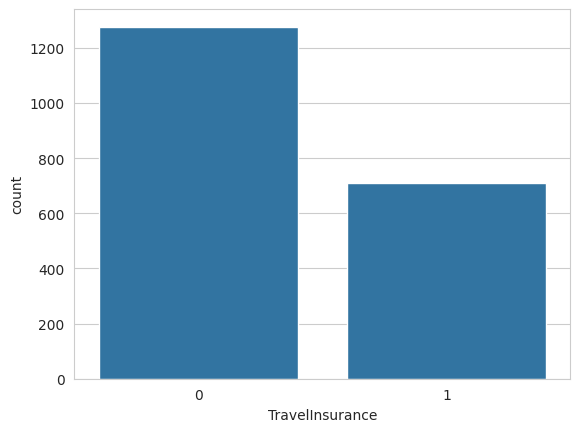

In [1185]:
sns.set_style("whitegrid")
sns.countplot(df, x = 'TravelInsurance')

Анализ диаграммы показывает, что набор данных является сбалансированным

In [1186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


В этом наборе данных у нас есть два класса: 0 и 1, что делает эту задачу задачей бинарной классификации.

Выполним бинарную классификацию с использованием логистической регрессии с
помощью sklearn.

### 2. Проверяем наличие пропущенных значений и выбросов

In [1187]:
# проверка на пропущенные значения
print(df.isnull().sum())

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


<Axes: xlabel='Age'>

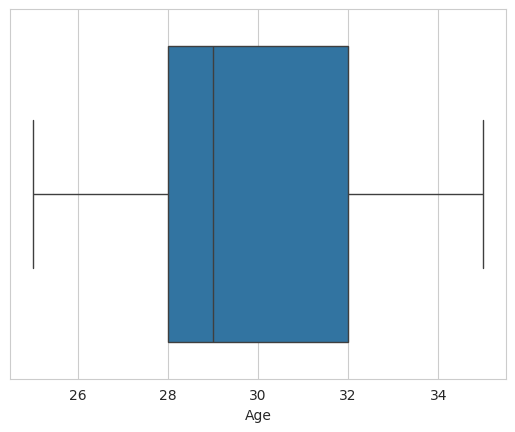

In [1188]:
# проверка на выбросы
sns.boxplot(x=df['Age'])

### 3. Исключаем невлияющие категориальные признаки


In [1189]:
df_copy = df.copy()

df_copy.drop("GraduateOrNot", axis=1, inplace=True)

df_copy.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,700000,8,1,Yes,No,0


Признаки "Employment Type", Frequent Flyer" и "Ever Travelled Abroad" имеют по два значения.

Эти признаки, по сути, бинарные и для них можно использовать значения 0 и 1.

In [1190]:
binary_emp_type = {"Government Sector": 1, "Private Sector/Self Employed": 0}
df_copy['Employment Type'] = df_copy['Employment Type'].map(binary_emp_type)
df_copy.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,400000,6,1,No,No,0
1,31,0,1250000,7,0,No,No,0
2,34,0,500000,4,1,No,No,1
3,28,0,700000,3,1,No,No,0
4,28,0,700000,8,1,Yes,No,0


In [1191]:
binary_yes_no = {"Yes": 1, "No": 0}
df_copy['FrequentFlyer'] = df_copy['FrequentFlyer'].map(binary_yes_no)
df_copy['EverTravelledAbroad'] = df_copy['EverTravelledAbroad'].map(binary_yes_no)
df_copy.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,400000,6,1,0,0,0
1,31,0,1250000,7,0,0,0,0
2,34,0,500000,4,1,0,0,1
3,28,0,700000,3,1,0,0,0
4,28,0,700000,8,1,1,0,0


### 4. Разделяем данные на признаки и целевую переменную

In [1192]:
y = df_copy['TravelInsurance']
X = df_copy.drop('TravelInsurance', axis=1)

In [1193]:
X

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,400000,6,1,0,0
1,31,0,1250000,7,0,0,0
2,34,0,500000,4,1,0,0
3,28,0,700000,3,1,0,0
4,28,0,700000,8,1,1,0
...,...,...,...,...,...,...,...
1982,33,0,1500000,4,0,1,1
1983,28,0,1750000,5,1,0,1
1984,28,0,1150000,6,1,0,0
1985,34,0,1000000,6,0,1,1


### 5. Применяем операцию нормализации для численной устойчивости


In [1194]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)


In [1195]:
X

array([[ 0.4634296 ,  1.5766943 , -1.41406139, ...,  1.6123392 ,
        -0.51536889, -0.48627715],
       [ 0.4634296 , -0.63423836,  0.84201171, ..., -0.62021689,
        -0.51536889, -0.48627715],
       [ 1.49344596, -0.63423836, -1.14864102, ...,  1.6123392 ,
        -0.51536889, -0.48627715],
       ...,
       [-0.56658675, -0.63423836,  0.57659134, ...,  1.6123392 ,
        -0.51536889, -0.48627715],
       [ 1.49344596, -0.63423836,  0.1784608 , ..., -0.62021689,
         1.9403577 ,  2.05644046],
       [ 1.49344596, -0.63423836, -1.14864102, ..., -0.62021689,
        -0.51536889, -0.48627715]])

### 6. Разделяем данные на тренировочный и тестовый наборы


75% данных используется для обучения и 25%- для тестирования.


In [1196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 7. Обучаем модель логистической регрессии


In [1197]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 8. Делаем прогноз на основе данных тестирования


In [1198]:
y_pred = model.predict(X_test)

### 9. Рассчитываем показатели точности, сравнив фактические и прогнозируемые значения


In [1199]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  88
False Positive(FP) =  35
True Negative(TN)  =  293
False Negative(FN) =  81
Accuracy of the binary classification = 0.767


In [1200]:
# оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7665995975855131


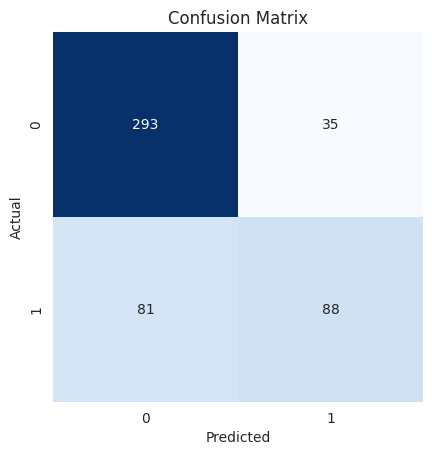

In [1201]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1202]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.77


In [1203]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")


Точность: 0.72
Полнота: 0.52


In [1204]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1:.2f}")


F1-мера: 0.60


In [1205]:
df_copy.corr()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,0.115134,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,0.115134,1.000000,-0.349157,0.003354,0.011553,-0.143790,-0.181098,-0.147847
AnnualIncome,-0.020101,-0.349157,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,0.003354,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,0.011553,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,-0.143790,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,-0.181098,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,-0.147847,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


### 10. Строим ROC-кривую


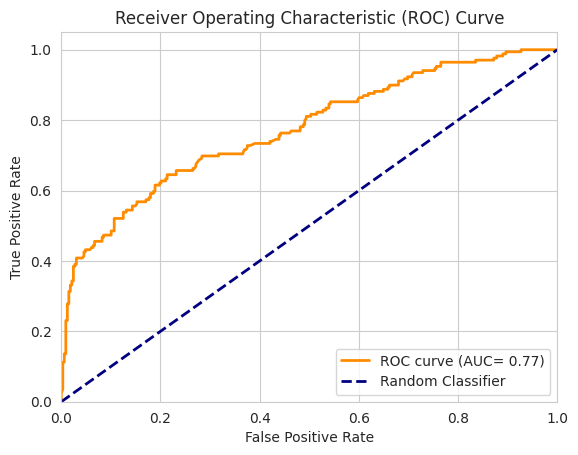

In [1206]:
from sklearn.metrics import roc_curve, auc

# Получаем предсказанные вероятности для класса 1
y_score = model.predict_proba(X_test) [:, 1]

# Рассчитываем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# (Опционально) Рассчитываем AUC (Area Under Curve) площадь под кривой
roc_auc = auc(fpr, tpr)

# Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC= {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()